#Check For Duplicates in Dataset

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, json
from scipy.misc import imresize
from IPython.html.widgets import interact
from IPython.display import clear_output
import cPickle as pickle

:0: FutureWarning: IPython widgets are experimental and may change in the future.


###Get Image Paths

In [13]:
images = []

root = '/home/kuprel/datasets'
for path, dirs, files in os.walk(root):
    for file in files:
        if '.jpg' in file:
            image = os.path.join(path, file).replace(root,'')
            images.append(image)            

images = sorted(images)

print len(images)

83929


In [14]:
with open('images.json', 'wb') as file: json.dump(images, file)

###Form Data Matrix

In [6]:
X = zeros((len(images), 256, 256, 3), dtype='uint8')

for i, x in enumerate(images):
    
    X[i] = imresize(imread(x), (256,256))
    
    if i%100 is 0:
        clear_output()
        display(i)

83900

In [7]:
with open('X.npy', 'wb') as file: save(file, X)

###Calculate Distance Matrix (not really)

In [ ]:
X = X.reshape(len(X),-1).astype(float32)
s = sum(X**2, axis=1, keepdims=True)
D = s-2*X.dot(X.T)+s.T

###Verify Distance Matrix

In [ ]:
with open('X.npy', 'rb') as file: X = load(file)
with open('D.npy', 'rb') as file: D = load(file)

In [7]:
i, j = randint(len(X), size=2)
xi = X[i].astype(float32)
xj = X[j].astype(float32)
print norm(xi-xj)
print D[i,j]

18650.3
18656.0


###Find Similar Pairs

In [3]:
with open('D.npy', 'rb') as file: D = load(file)
n = len(D)
d = D[tril(ones((n,n), dtype=bool), k=-1)]
del D
k = 10**5
i = argpartition(d, k)[:k].copy()
i = i[argsort(d[i])]
d = d[i].copy()
IJ = tril_indices(n, k=-1)
IJ = zip(IJ[0][i], IJ[1][i])
with open('d.npy', 'wb') as file: save(file, d)
with open('IJ.npy', 'wb') as file: save(file, IJ)

###Show Pairs

In [4]:
with open('X.npy', 'rb') as file: X = load(file)
with open('d.npy', 'rb') as file: d = load(file)
with open('IJ.npy', 'rb') as file: IJ = load(file)
with open('images.json', 'rb') as file: images = json.load(file)

0.0

u'/dermis/scar-strict-atrophic/00029357.jpg'

u'/dermis/nevocytic-nevus/00032348.jpg'

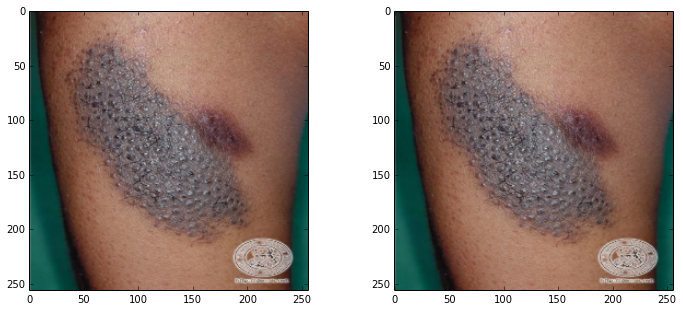

In [5]:
fig = figure(figsize=(12,5))
subplot(1,2,1)
plt1 = imshow(X[0])
subplot(1,2,2)
plt2 = imshow(X[0])

@interact(pair=(0, k-1))
def show_pair(pair):
    i, j = IJ[pair]
    plt1.set_array(X[i])
    plt2.set_array(X[j])
    display(d[pair])
    display(images[i])
    display(images[j])
    display(fig)

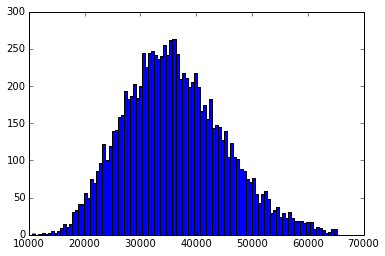

In [3]:
with open('D.npy', 'rb') as file: D = load(file)
n = len(D)
d = D[tril(ones((n,n), dtype=bool), k=-1)]
d = d[d<inf]
del D

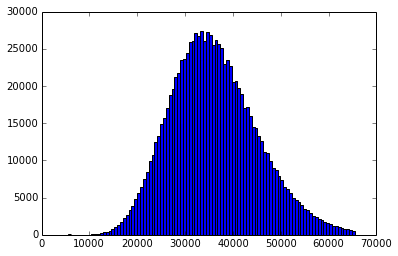

In [8]:
hist(random.choice(d, size=10**6), bins=100);